In [101]:
import pandas as pd
import numpy as np
from math import * 
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
import pickle

%matplotlib inline

In [102]:
G = nx.read_edgelist("facebook_combined.txt", nodetype = int)

# mise en page graphique
with open('networkShape.pkl', 'rb') as f:
    sp = pickle.load(f)

# lire des données
data = pd.read_csv("TOPSIS_result.csv", header = 0)
data.drop(columns=['TOPSIS'], inplace=True)
data = data.set_index('node')

# matrice d'adjacence de G - avec l'ordre des données
mat = nx.to_numpy_array(G, nodelist = data.index.tolist() )


In [103]:
# kmeans
def kmeans(X, n_cluster):
  
    init = X[0:n_cluster]    
    # kmeans application
    km = KMeans(n_clusters = n_cluster, n_init=1, init = init, max_iter = 1000)
    cluster = km.fit_predict(X)
    res = data.copy()
    res['cluster'] = cluster
    res.drop(columns=['DC','BC','CC', 'EC'], inplace=True)
    res.reset_index(inplace=True)
    res.rename(columns={"index":'node'}, inplace=True)
    #distance des centroïdes
    centroids = km.cluster_centers_
    diff = (init - centroids) ** 2
    dist = []
    for i in range(diff.shape[0]):
        dist.append(sqrt(sum(diff[i])))
        
    comp = res.head(n_cluster).copy()
    comp = comp.assign(dist_from_centroid = dist)

    return (res , comp)
  

In [104]:
# scatter plot
def scatter(result):
    plt.figure(figsize=(8,5))
    plt.scatter(result['node'], result['cluster'])
    plt.xlabel("Node")
    plt.ylabel("Cluster")
    return

# distribution
def distribution(result):
    d = result.groupby('cluster').size().to_dict()
    d = pd.DataFrame({'cluster' : d.keys(), 'size' : d.values()})
    ax = d.plot.bar(x = "cluster", y = 'size', figsize=(8, 5)) 
    plt.title('node distribution')
    plt.xlabel('Cluster')
    plt.ylabel('nodes number')
    plt.grid(axis='y', alpha=0.75)
    # ajouter la valeur de chaque barre
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    return

In [105]:
#groupe de nœuds
def node_group(result):
    node_part = []
    for i in sorted(result.cluster.unique().tolist()):
      c = list(result[result.cluster == i].node)
      node_part.append(c)
  
    return node_part

In [106]:
def node_group(result):
    node_part = []
    for i in sorted(result.cluster.unique().tolist()):
        c = list(result[result.cluster == i].node)
        node_part.append(c)
    
    return node_part
def plot_coms(coms):
    k = len(coms)

    node_size=[]
    for i in range(k):
        com_list=[]
        for j in coms[i]:
            list1 = data.head(k).index.tolist()
            if j in list1:
                com_list.append(1000)
            else:
                com_list.append(100)
        node_size.append(com_list)
        
    keyList = data.head(k).index.tolist()
    myDict = {key: key for key in keyList}
  
    plt.style.use("default")
    plt.figure(figsize=(16,8))
    shapes=['s','o','^','>','v','<','d','p','h','8','s','o','^','>','v','<','d','p','h','8']
    colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange', 'aqua','olive','indigo', 'lawngreen', 'burlywood','slategray']
    for i in range(k):
        nx.draw_networkx(G, pos=sp, nodelist = coms[i], node_color= colors[i],node_shape=shapes[i],node_size = node_size[i] ,with_labels=False , edgecolors='black')

    labels=nx.draw_networkx_labels(G,pos = sp, labels=myDict, font_color='w', font_weight='bold')
    return

In [107]:
# matrice d'adjacent pour les resultats de topsis :
#nombres des clusters
k = int(input("Enter the number of clusters : K = "))

Enter the number of clusters : K = 10


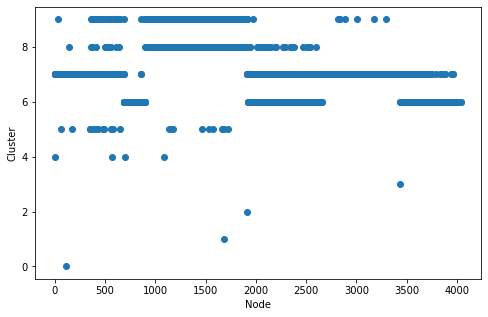

In [108]:
result , centroids_comparison = kmeans(data.values, k)
scatter(result)

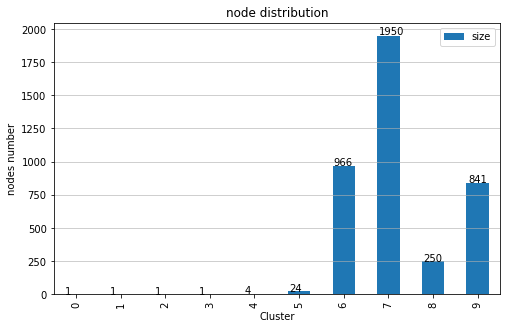

In [109]:
distribution(result)

In [110]:
node_partition = node_group(result)

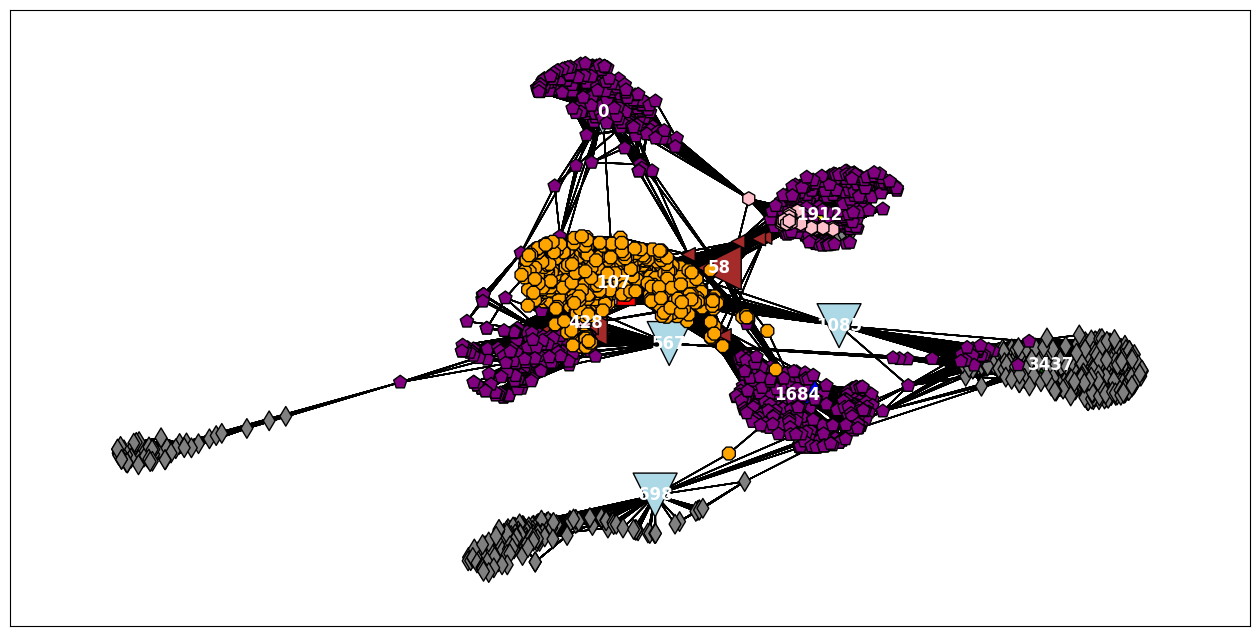

In [111]:
plot_coms(node_partition)

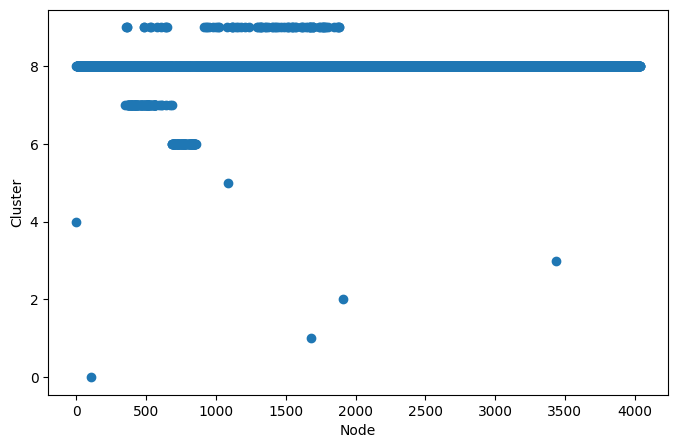

In [118]:
#matrice d'adjacence pour le dataset :
result , centroids_comparison = kmeans(mat, k)
scatter(result)

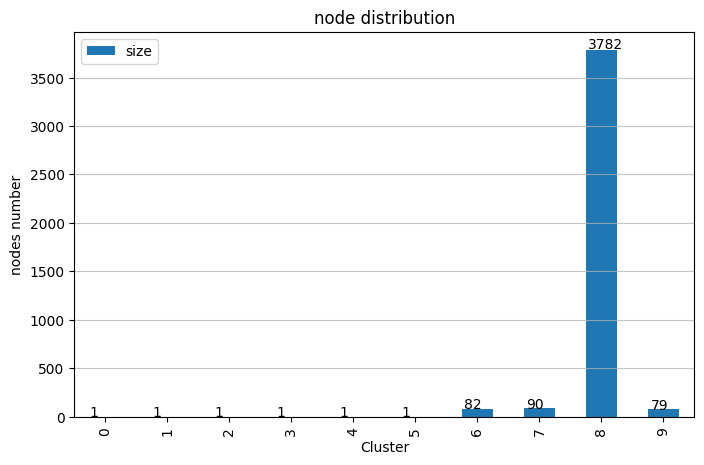

In [116]:
distribution(result)

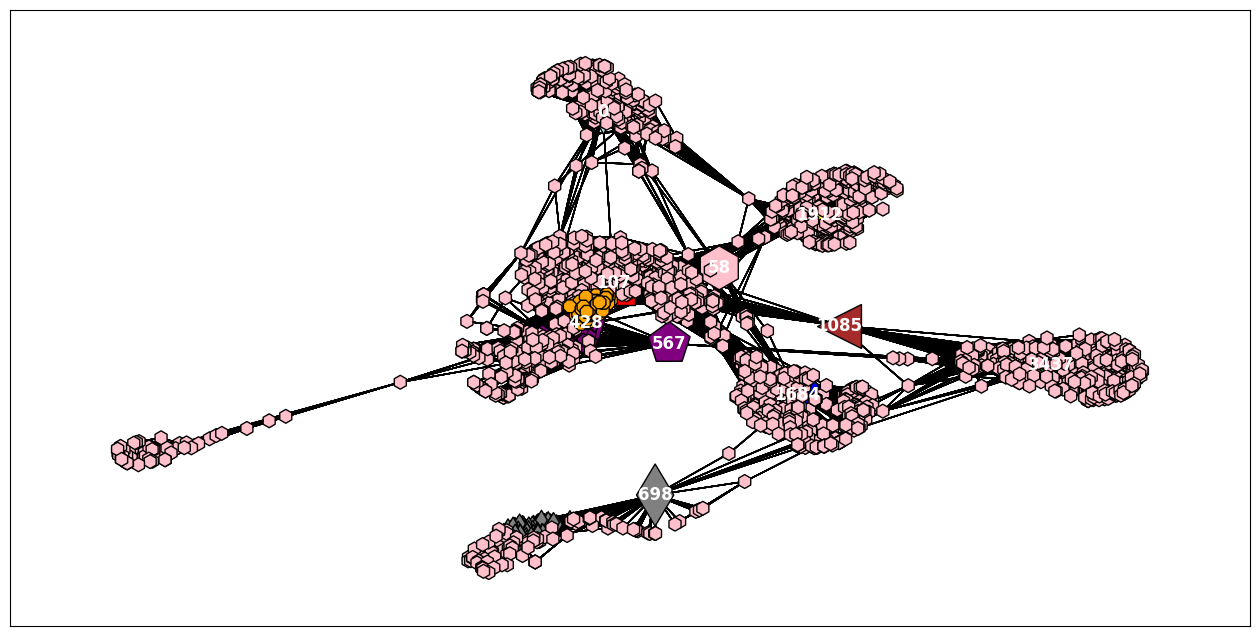

In [117]:
node_partition = node_group(result)
plot_coms(node_partition)